## PART B: EXPLORATORY DATA ANALYSIS

In [58]:
# %import libraries
import pandas as pd
import sweetviz as sv
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [59]:
# %loading datasets
df = pd.read_csv("../Data/Tanzania_Tourism_datasets.csv")

In [60]:
# %preview data
df.head()

,ID,country,age_group,travel_with,total_female,total_male,purpose,main_activity,info_source,tour_arrangement,...,package_transport_tz,package_sightseeing,package_guided_tour,package_insurance,night_mainland,night_zanzibar,payment_mode,first_trip_tz,most_impressing,total_cost
0,tour_0,SWIZERLAND,45-64,Friends/Relatives,1.0,1.0,Leisure and Holidays,Wildlife tourism,"Friends, relatives",Independent,...,No,No,No,No,13.0,0.0,Cash,No,Friendly People,674602.5
1,tour_10,UNITED KINGDOM,25-44,NaN,1.0,0.0,Leisure and Holidays,Cultural tourism,others,Independent,...,No,No,No,No,14.0,7.0,Cash,Yes,"Wonderful Country, Landscape, Nature",3214906.5
2,tour_1000,UNITED KINGDOM,25-44,Alone,0.0,1.0,Visiting Friends and Relatives,Cultural tourism,"Friends, relatives",Independent,...,No,No,No,No,1.0,31.0,Cash,No,Excellent Experience,3315000.0
3,tour_1002,UNITED KINGDOM,25-44,Spouse,1.0,1.0,Leisure and Holidays,Wildlife tourism,"Travel, agent, tour operator",Package Tour,...,Yes,Yes,Yes,No,11.0,0.0,Cash,Yes,Friendly People,7790250.0
4,tour_1004,CHINA,1-24,NaN,1.0,0.0,Leisure and Holidays,Wildlife tourism,"Travel, agent, tour operator",Independent,...,No,No,No,No,7.0,4.0,Cash,Yes,No comments,1657500.0


### Perform initial sweetViz analysis to get a feel of the data

                                             |      | [  0%]   00:00 -> (? left)


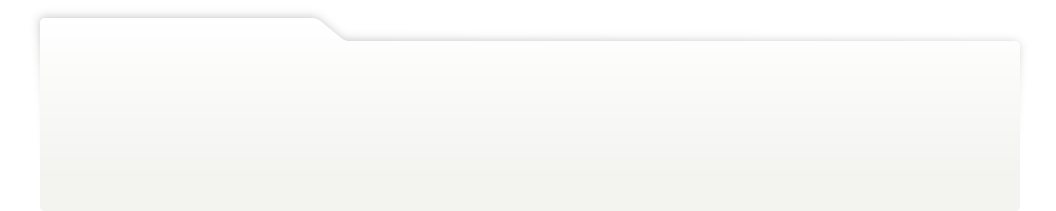
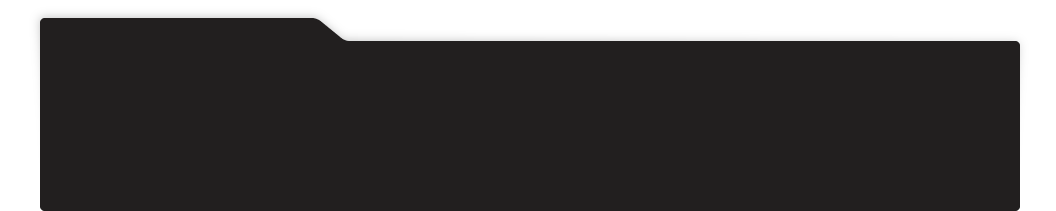
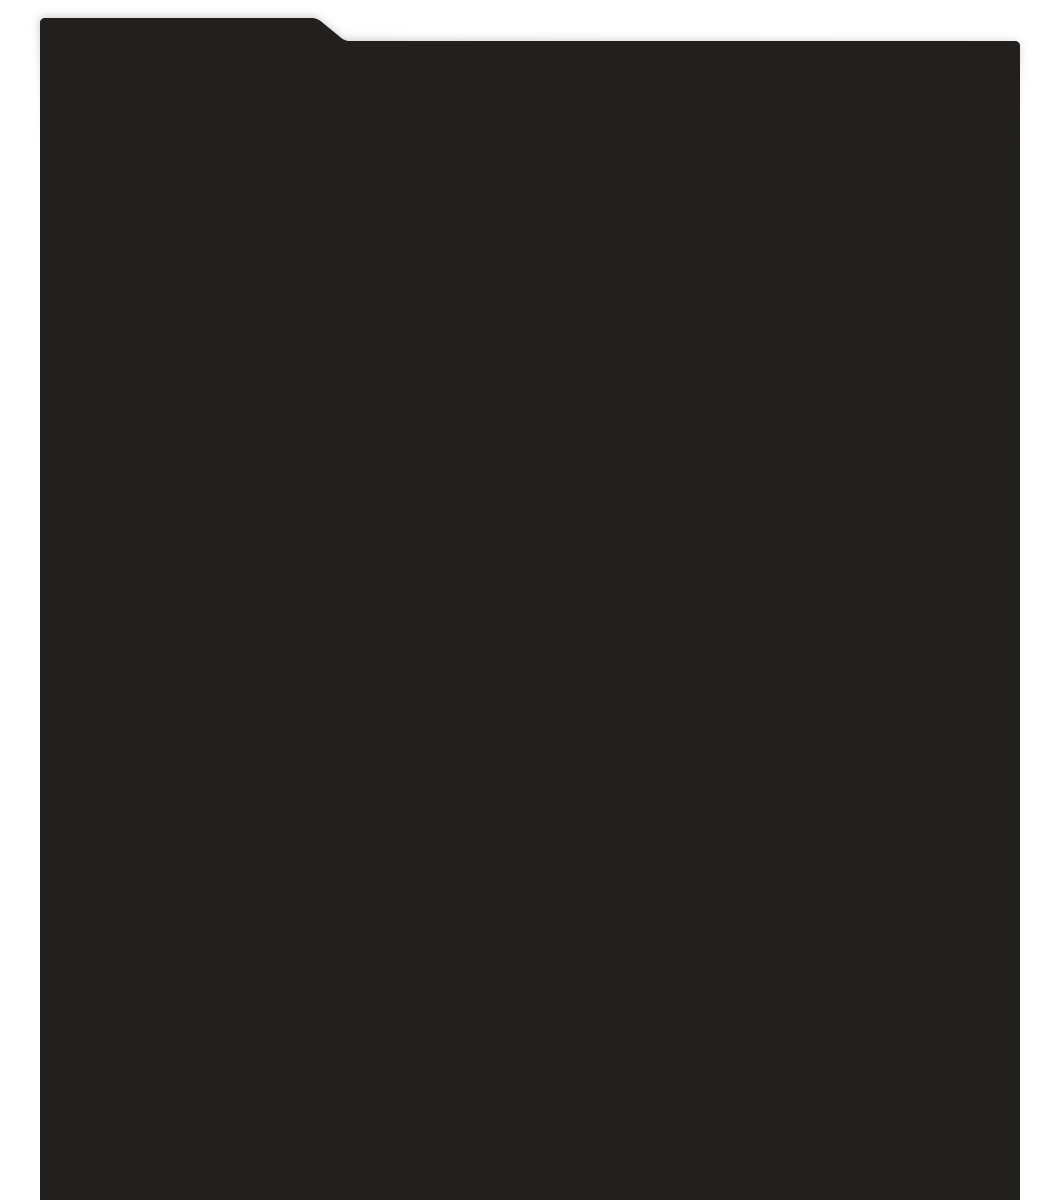
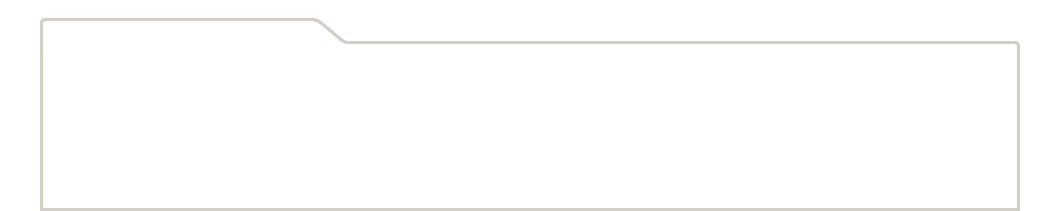
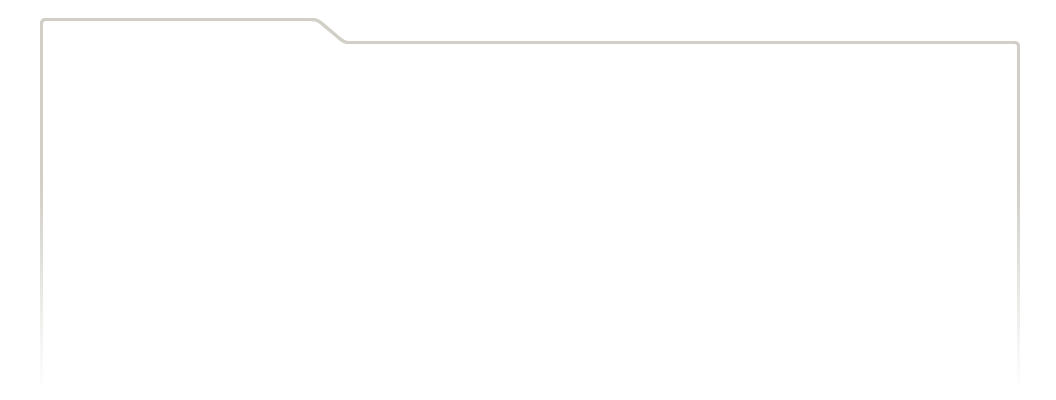
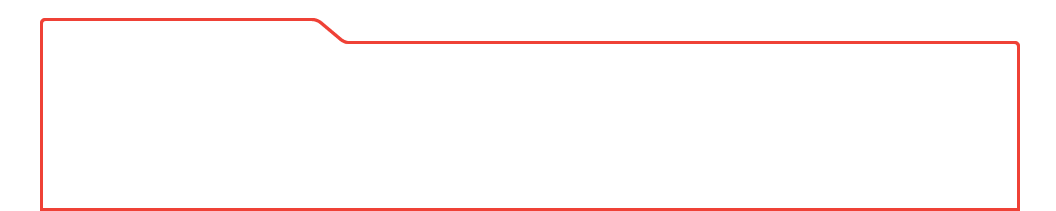
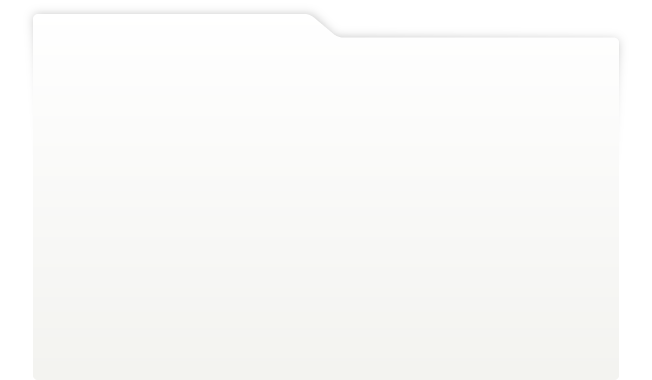
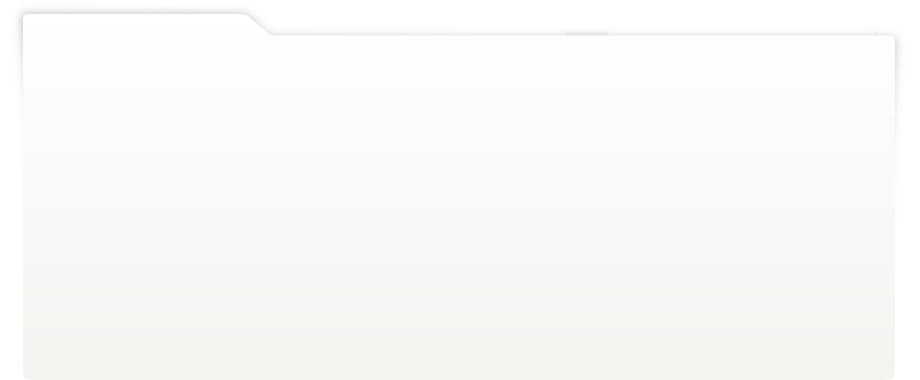
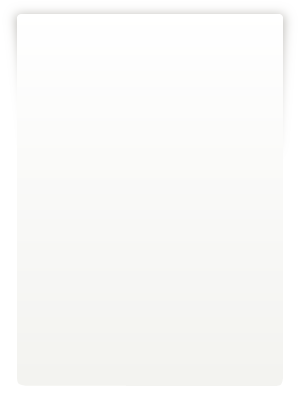
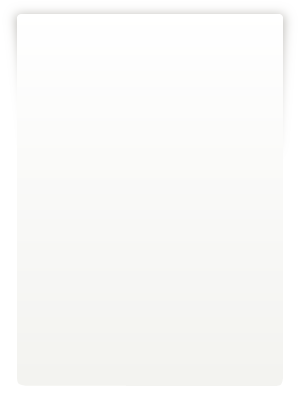
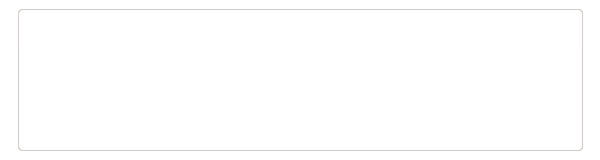
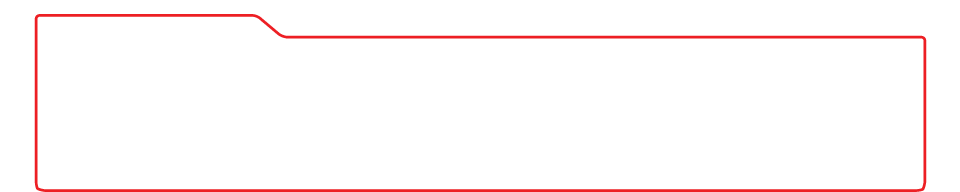
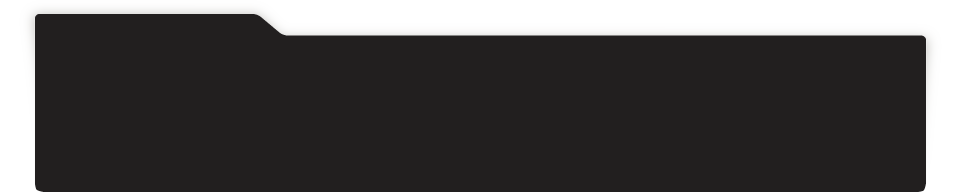
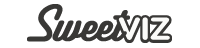
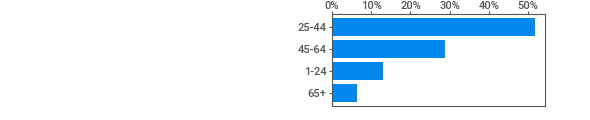
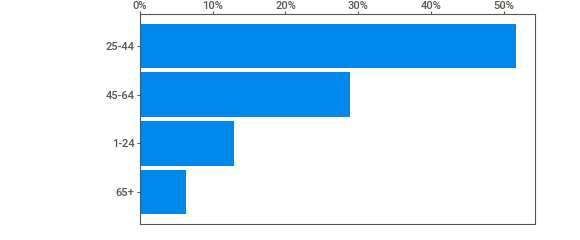
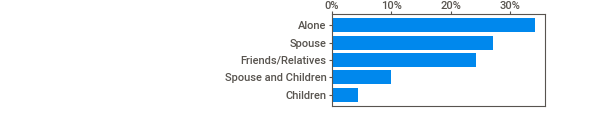
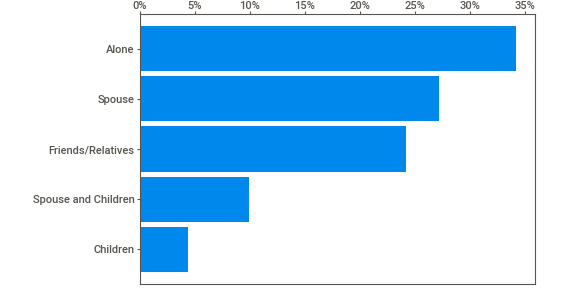
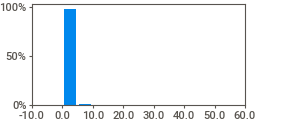
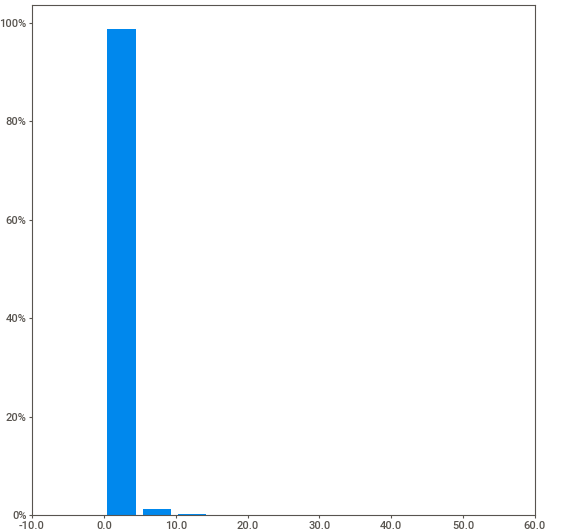
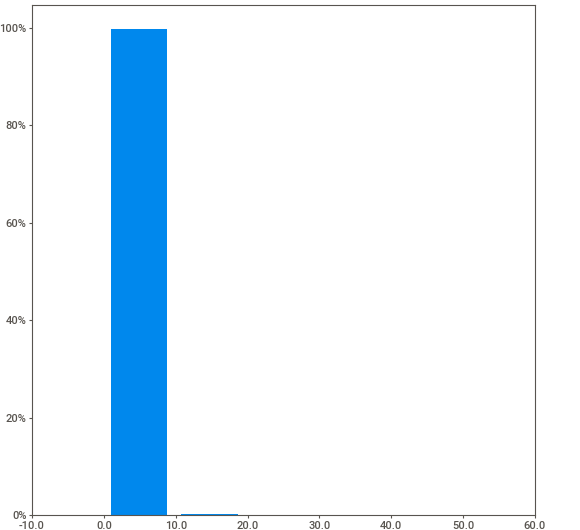
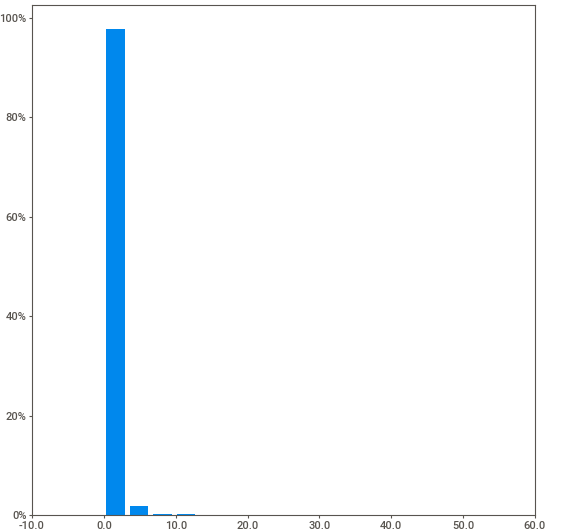
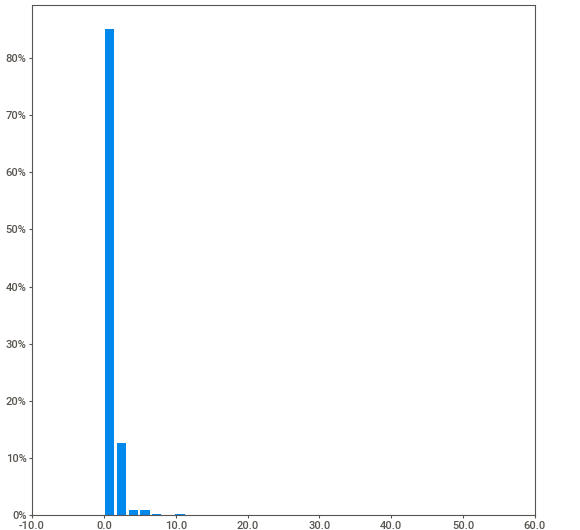
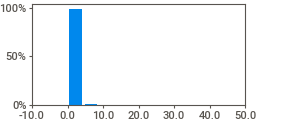
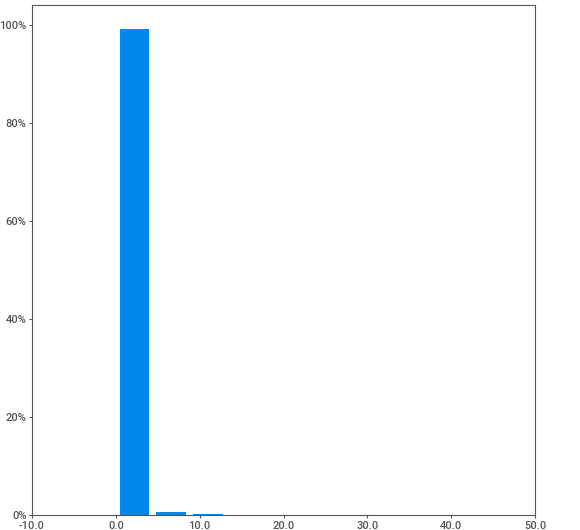
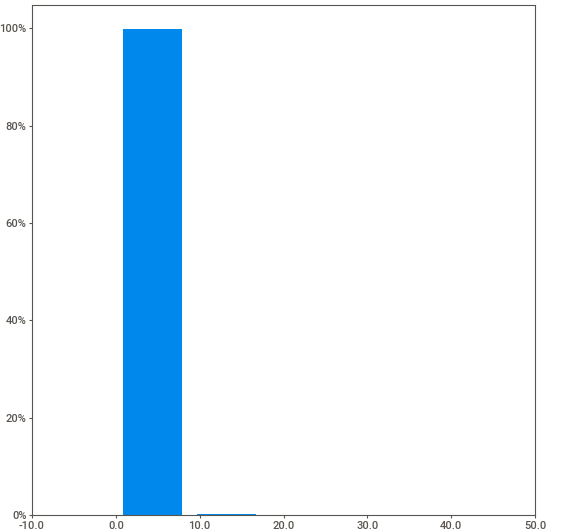
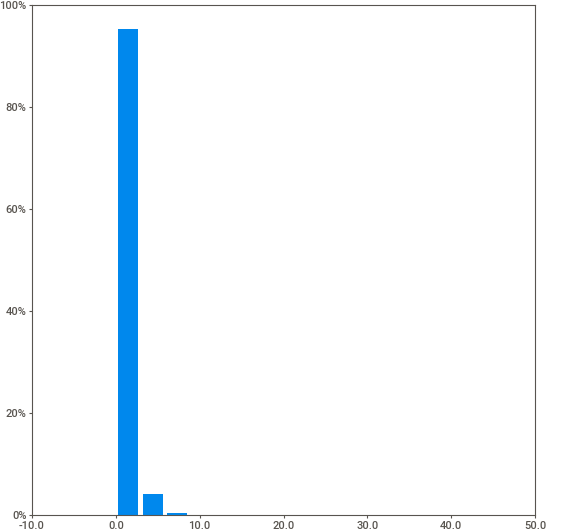
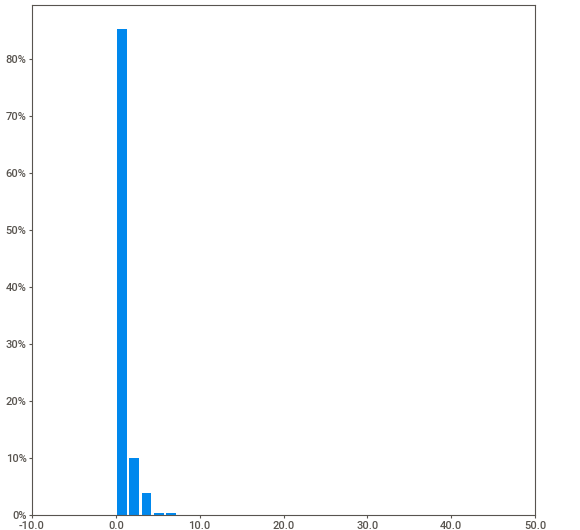
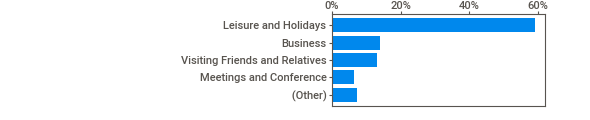
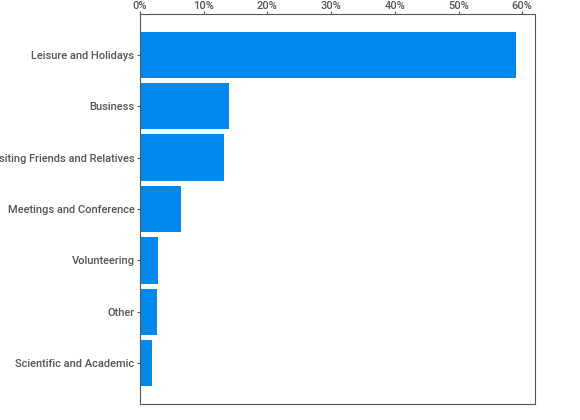
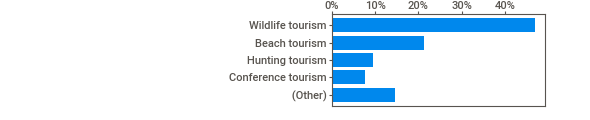
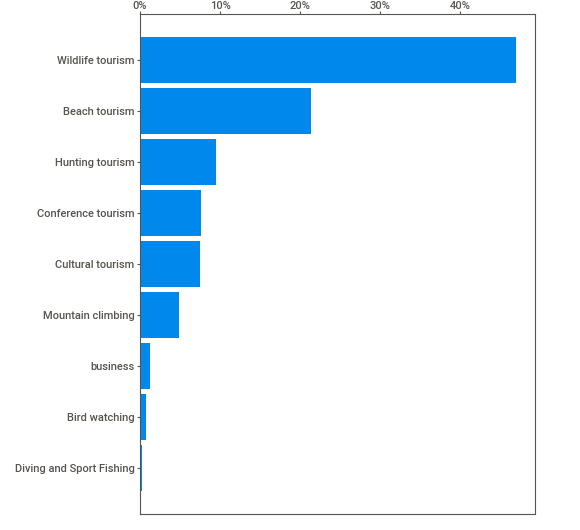
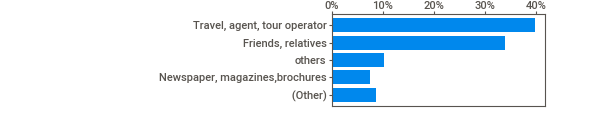
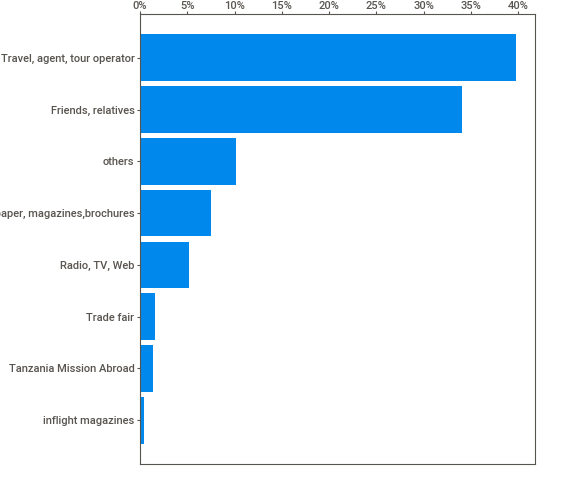
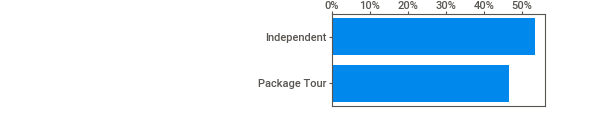
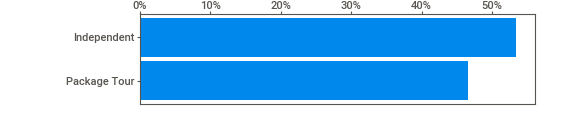
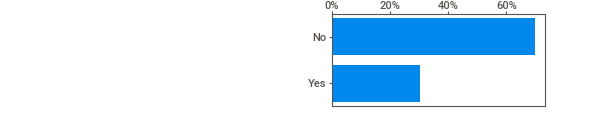
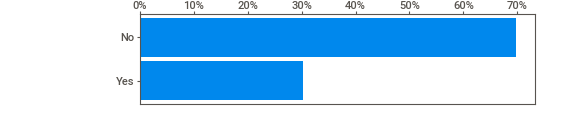
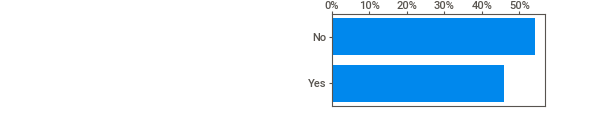
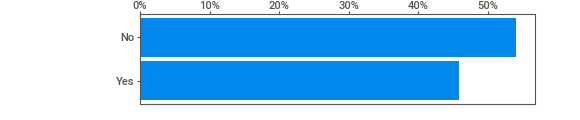
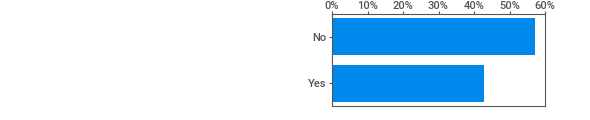
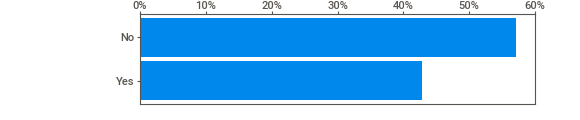
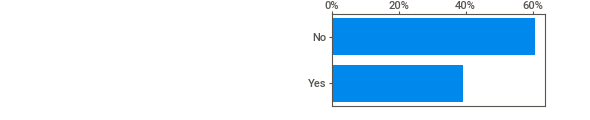
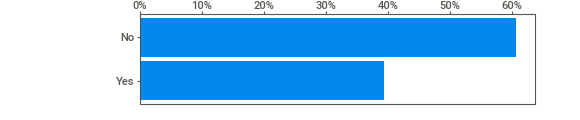
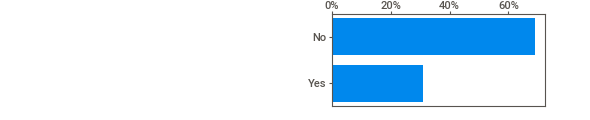
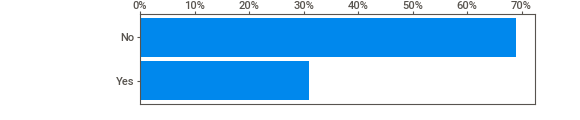
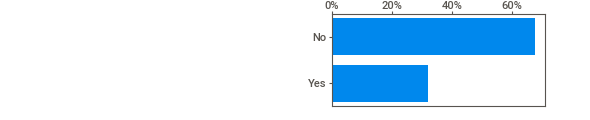
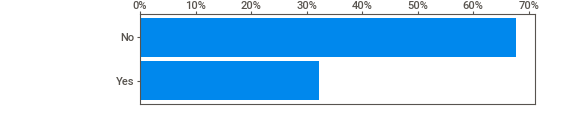
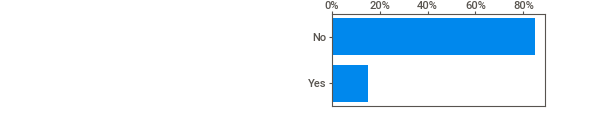
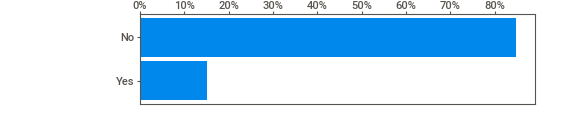
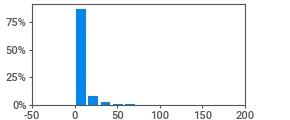
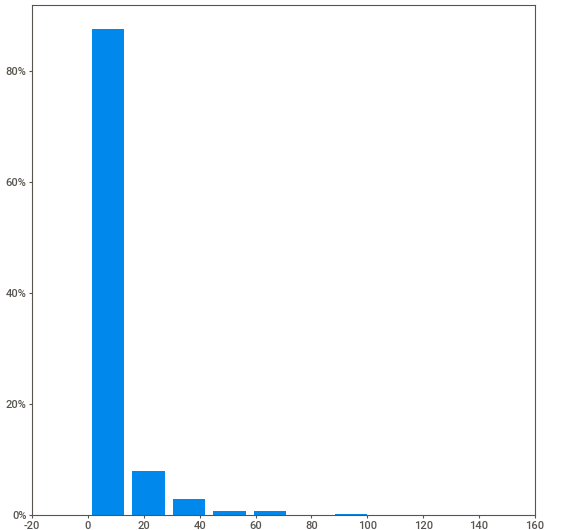
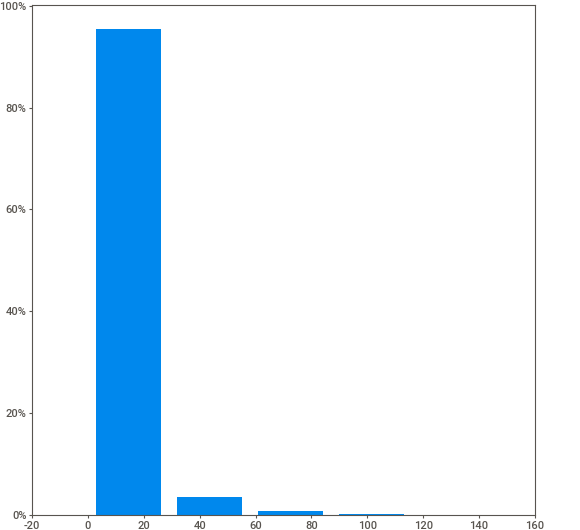
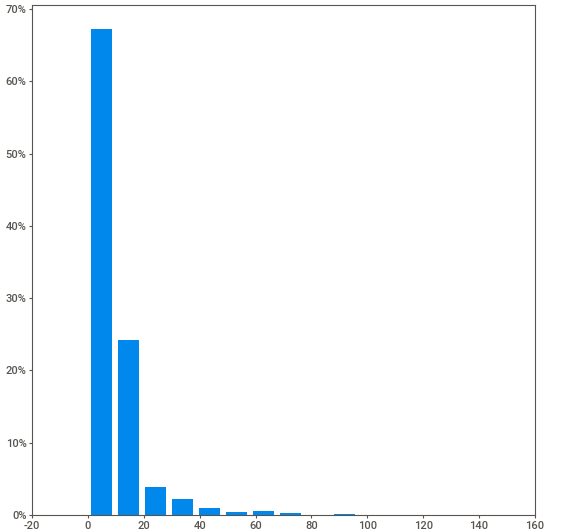
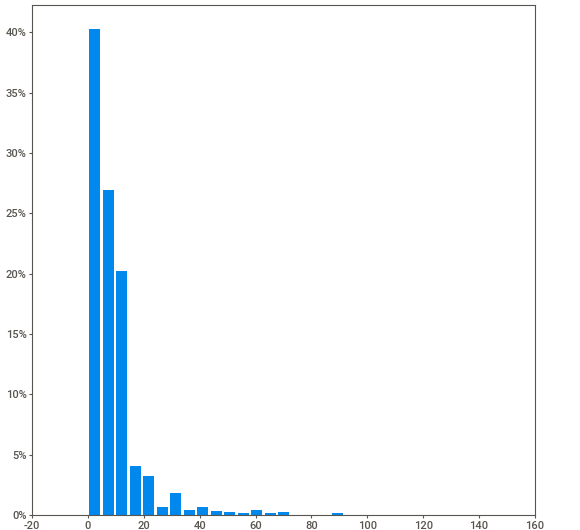
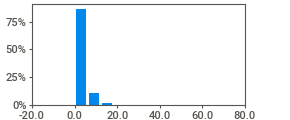
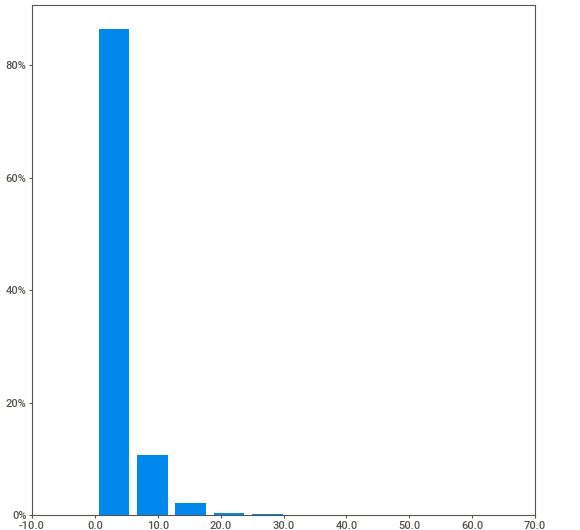
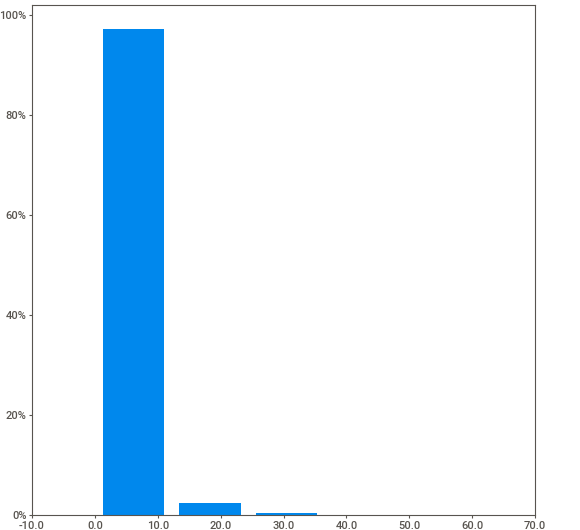
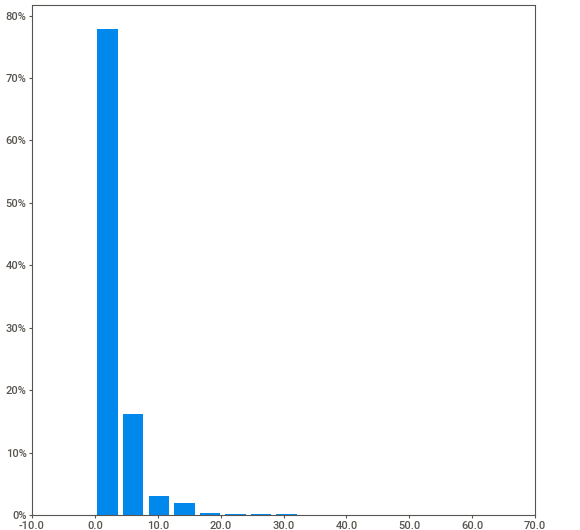
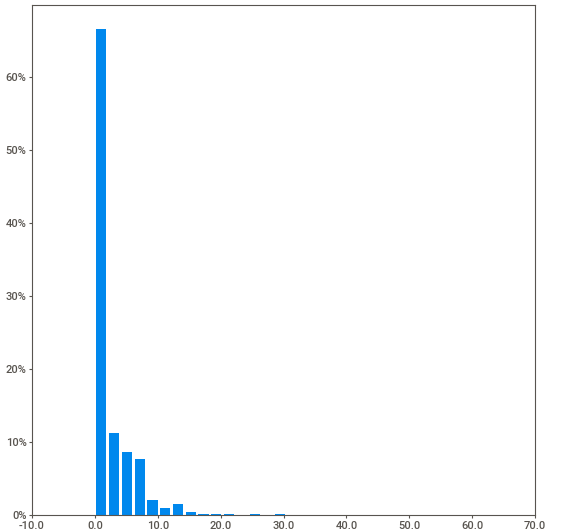
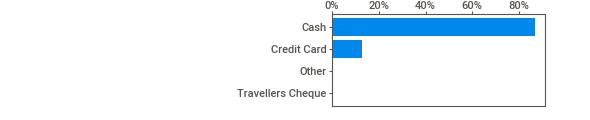
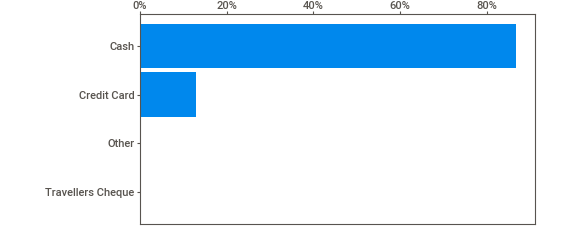
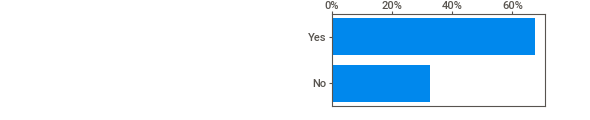
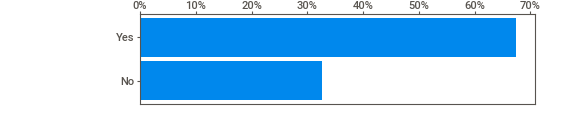
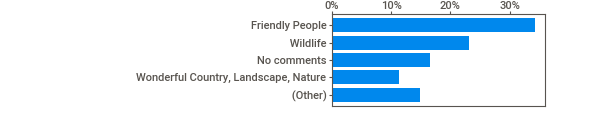
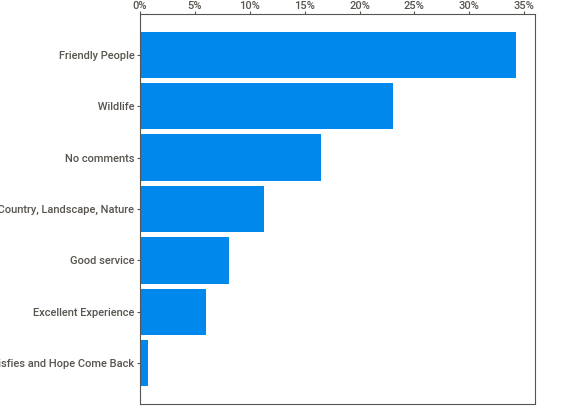
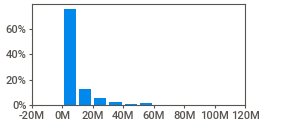
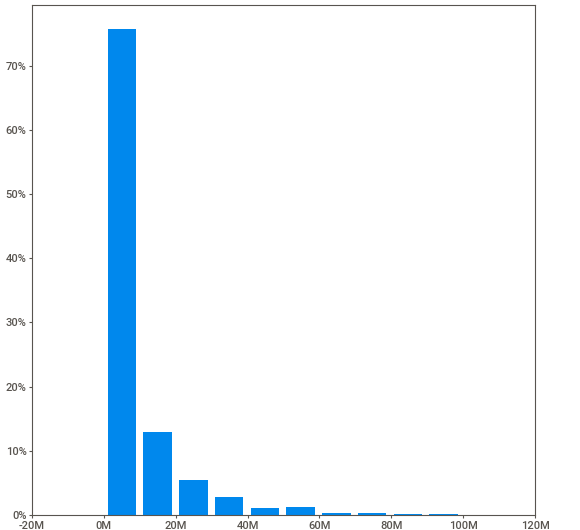
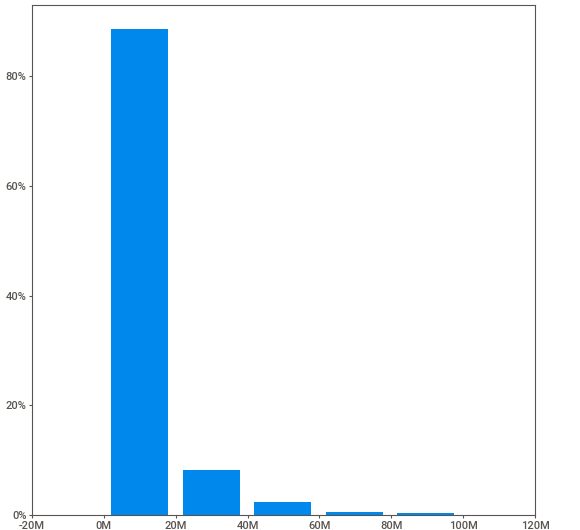
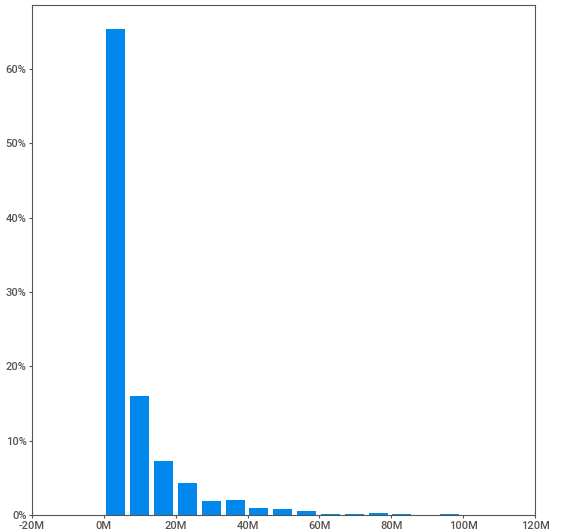
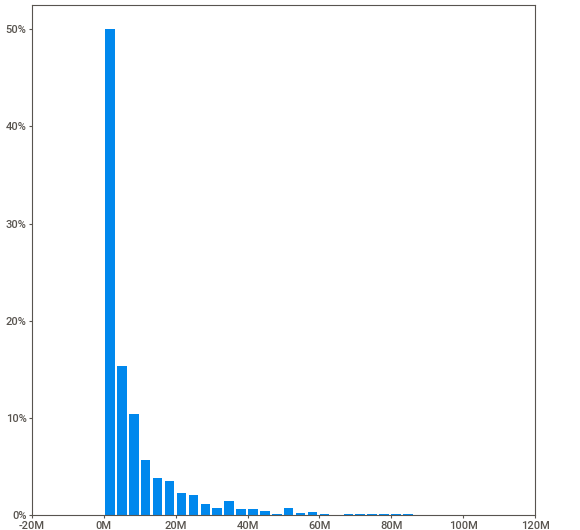
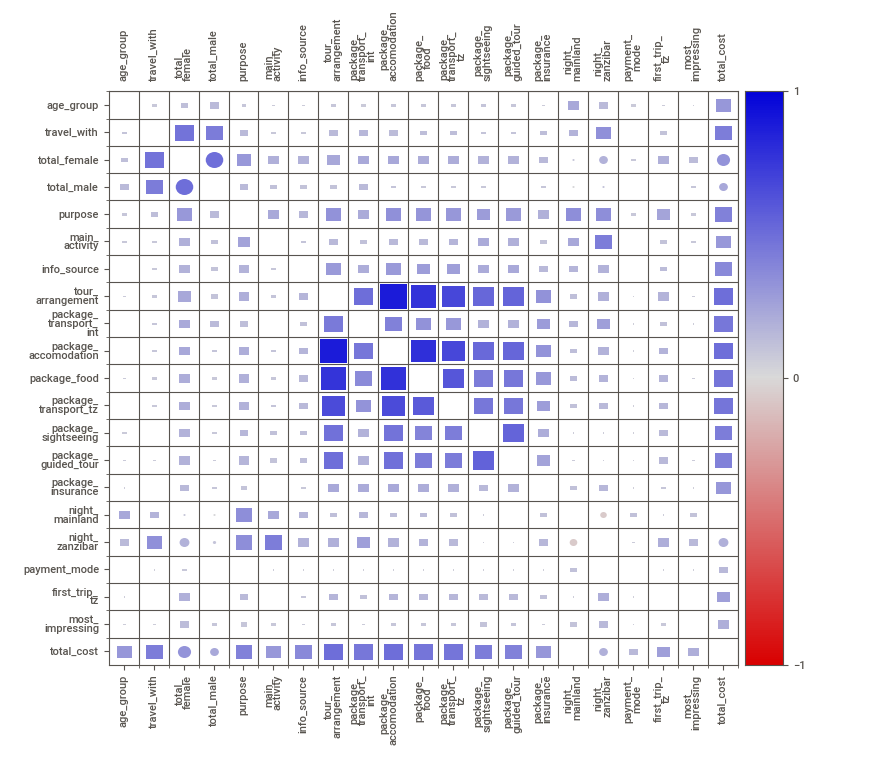
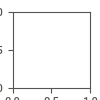

In [61]:
# %perform EDA analysis
df_report = sv.analyze(df)
df_report.show_notebook()

## ANALYSIS

Though the use of SweetViz, one is able to get a feel of the data. In the data cleaning process, we can identify columns that are candidates for imputation if the missing values are few, eg <10% and also columnsa that have way too many missing values that may be candidates for dropping entirely, such as >70% or 85%.

Always for more missing cloumns SweetViz provide indication with red colour.


### OBSERVATIONS
- The overall dataset has 4809 entry rows , 22 independent features where 16 are categorical,5 are numerical and 2 are text features.
- No duplicates
- Missing values from `travel_with`, `most_impressing`,`total_female`,`total_male`.
- Most of Tanzania tourism vistors are aged `25-44`.
- Most of Tanzania tourist they come during holidays for wildlife tourism.
- Most of Tanzania tourist they usually pay in cash.

I decided to impute all missing columns since missing rows are <30% for both columns, the leading one is `travel_with`.

### IMPUTING MISSING VALUES

To impute missing values, one has to check the distribution to see the best imputation method. If the data is very skewed, `using mean may not be the best approach` since the final values will gravitate towards the higher end of the scale which is False. After examining the dataset, mode seems to be a viable imputation approach since the data is highly skewed and the most frequent value in mostcases is a large number

In [68]:
# %decided to go with most frequent option "Alone"
df.travel_with.fillna('Alone',inplace=True)

# %decided to go with most frequent option "Friendly People"
df.most_impressing.fillna('Friendly People',inplace=True)

df.total_female.fillna(data.total_female.mode()[0],inplace = True)

df.total_male.fillna(data.total_female.mode()[0],inplace = True)

                                             |      | [  0%]   00:00 -> (? left)


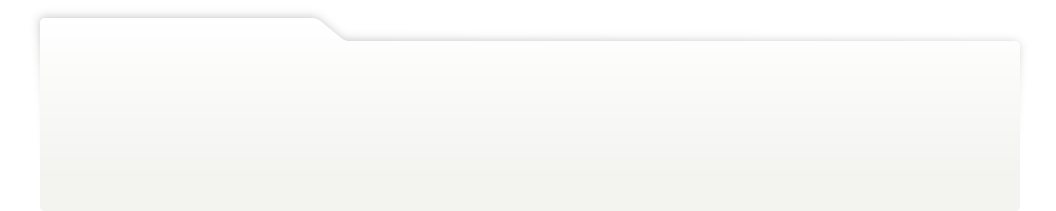
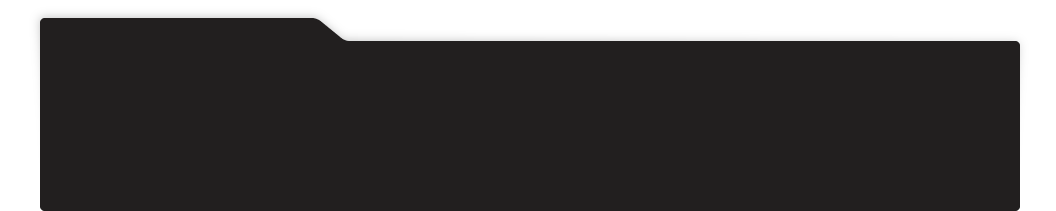
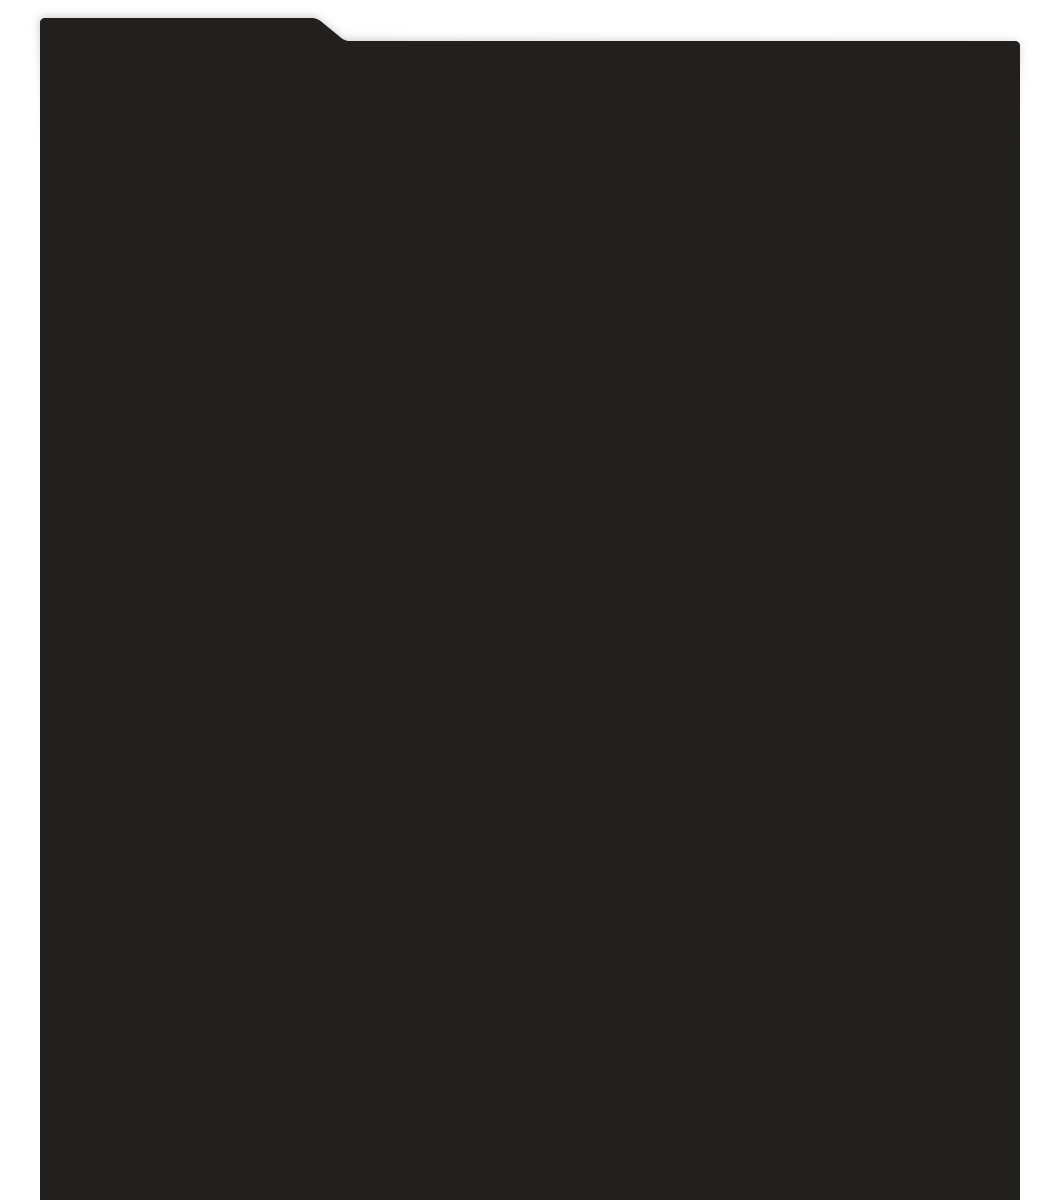
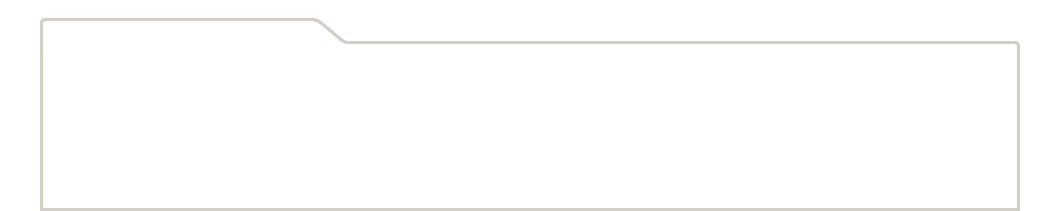
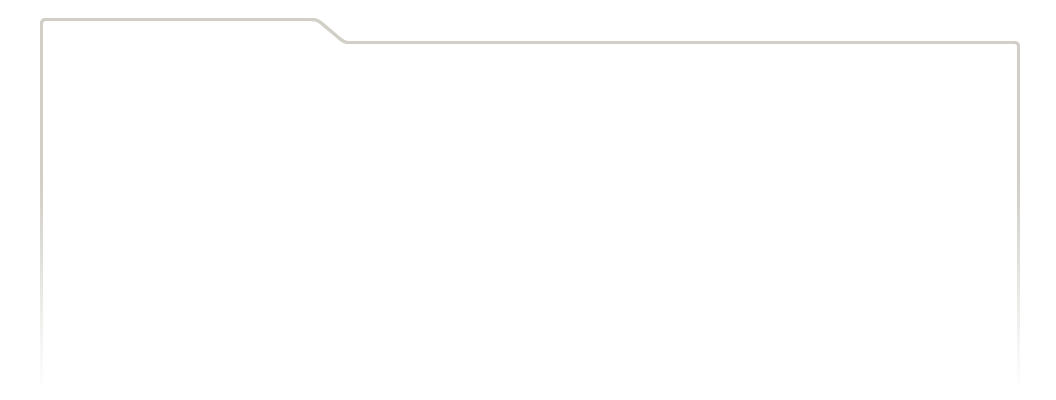
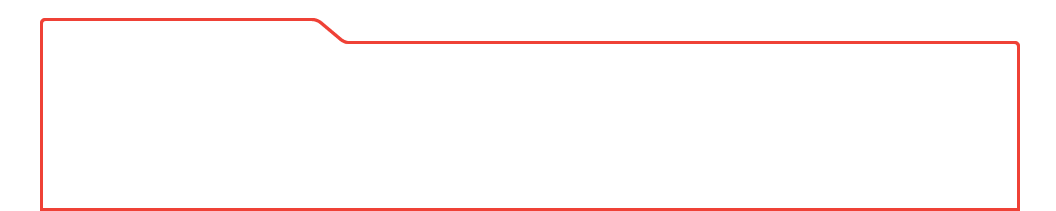
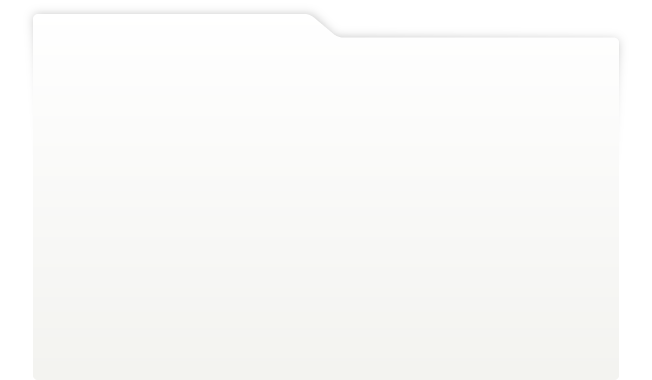
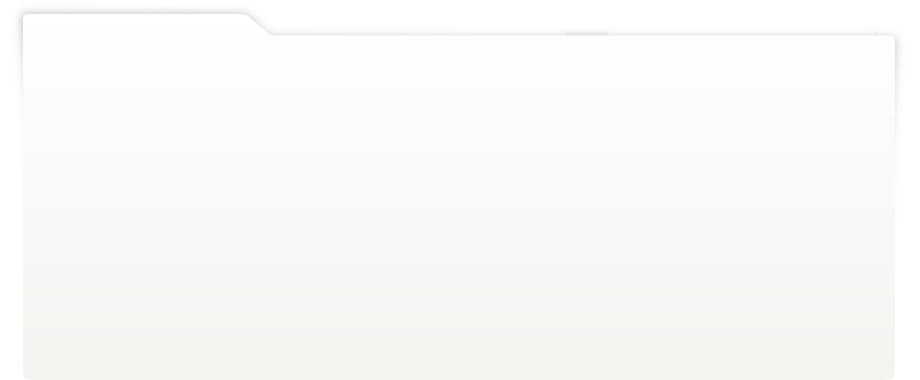
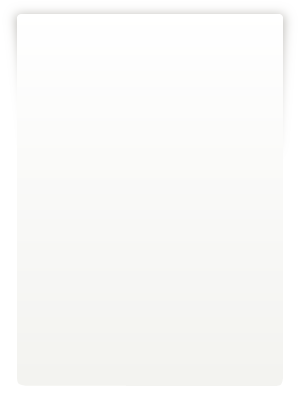
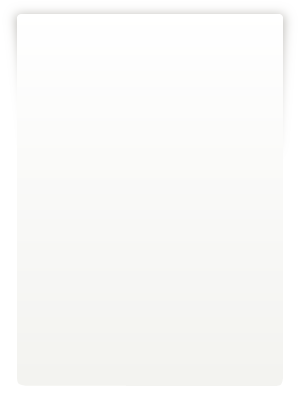
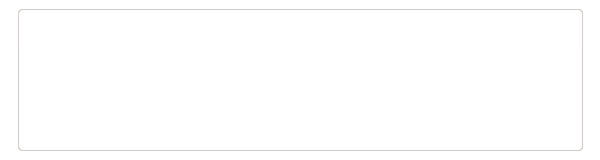
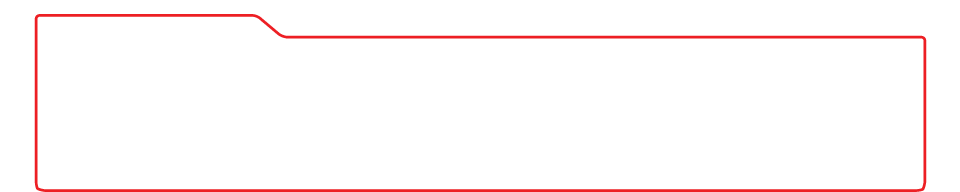
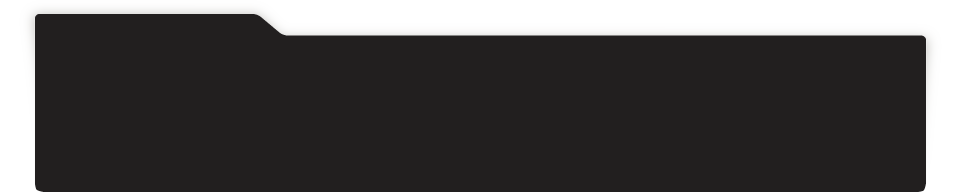
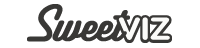
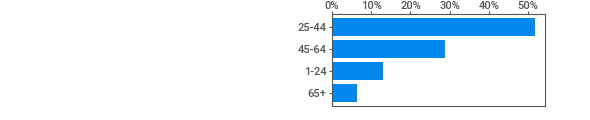
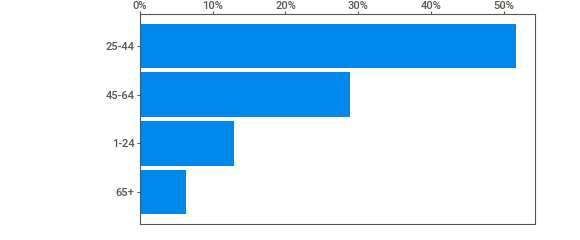
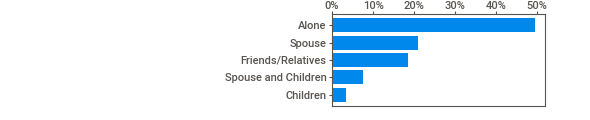
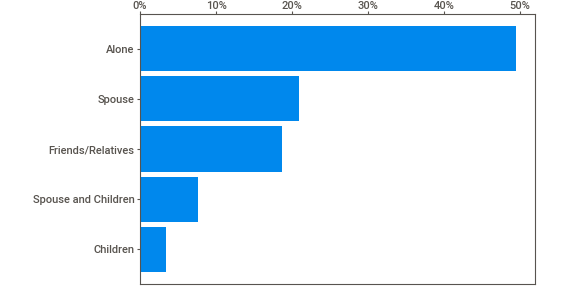
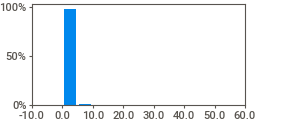
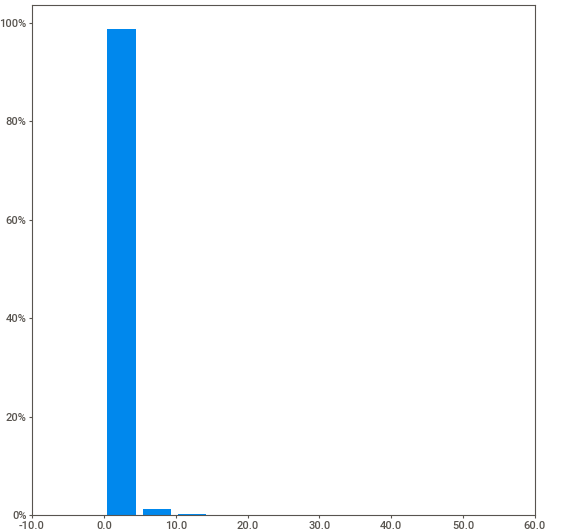
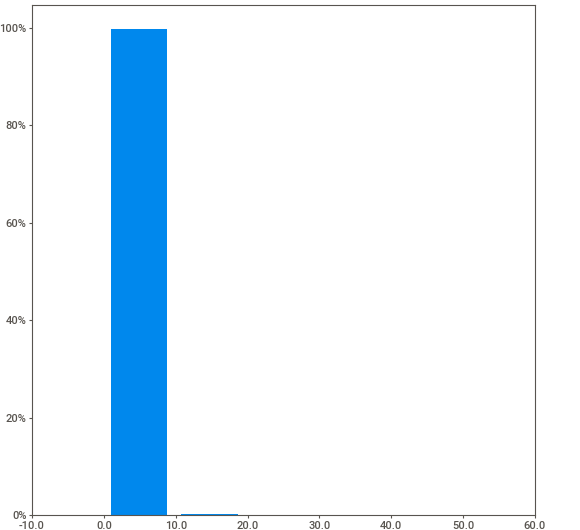
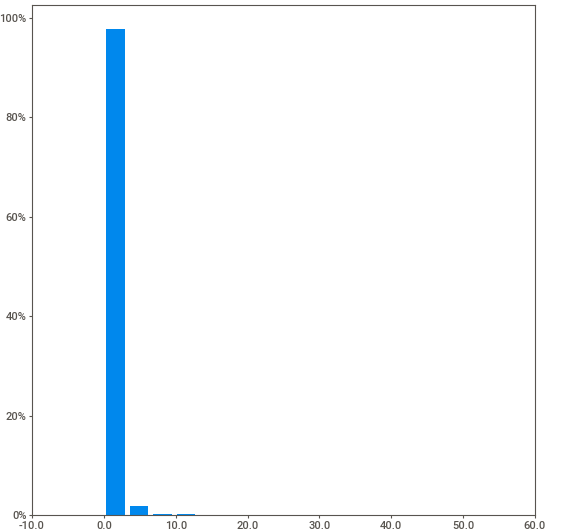
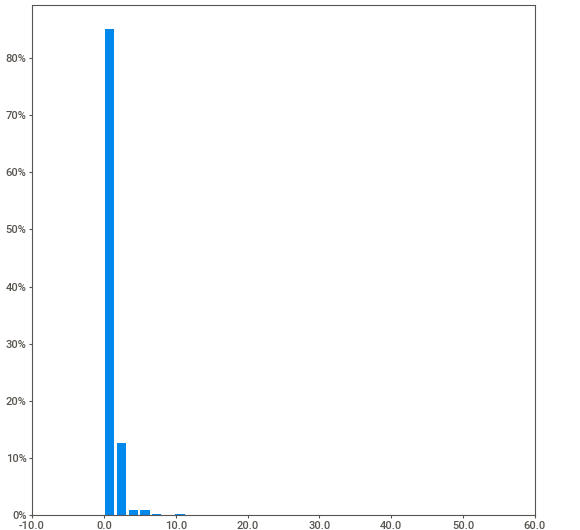
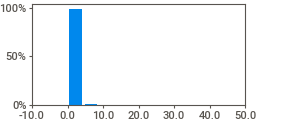
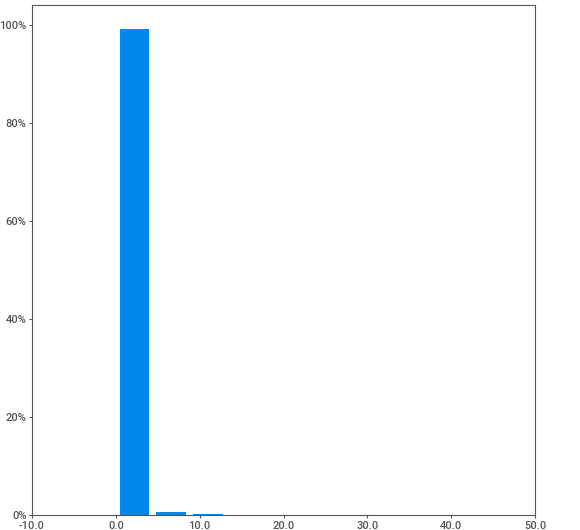
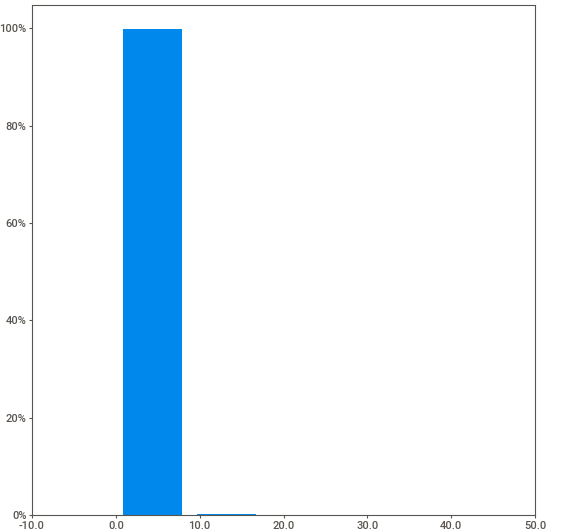
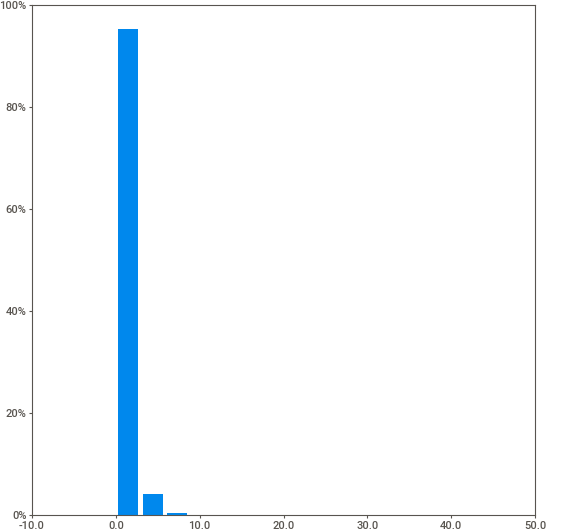
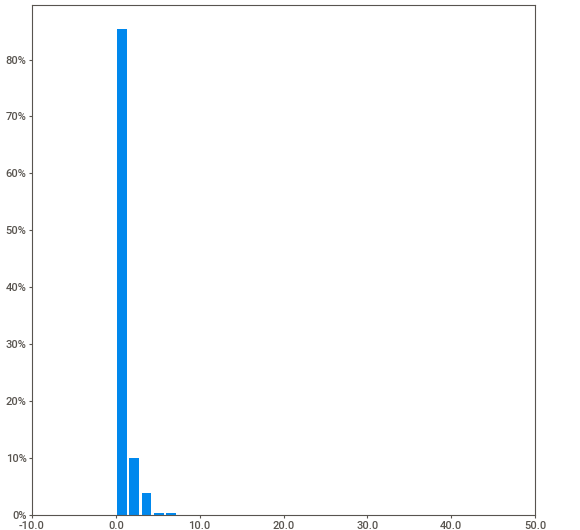
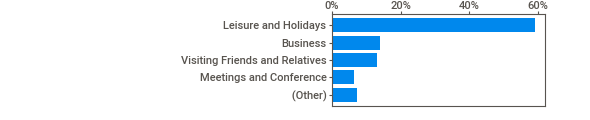
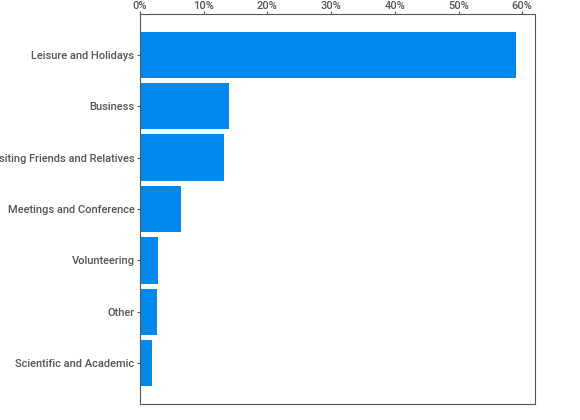
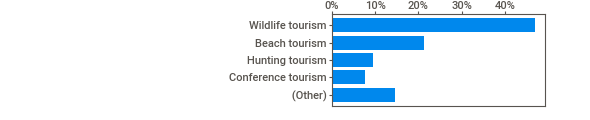
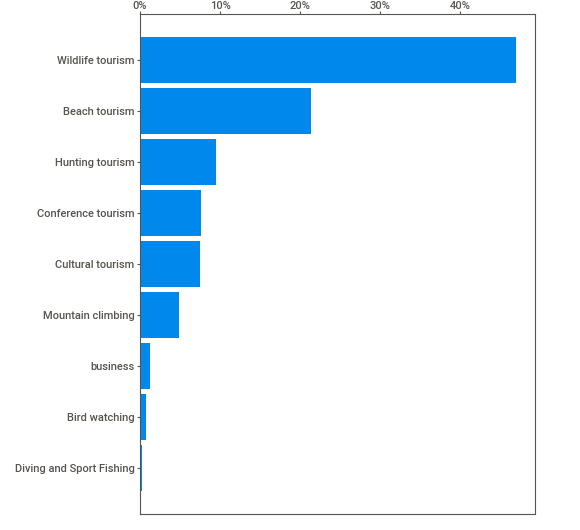
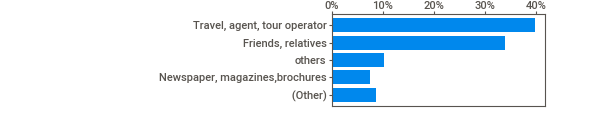
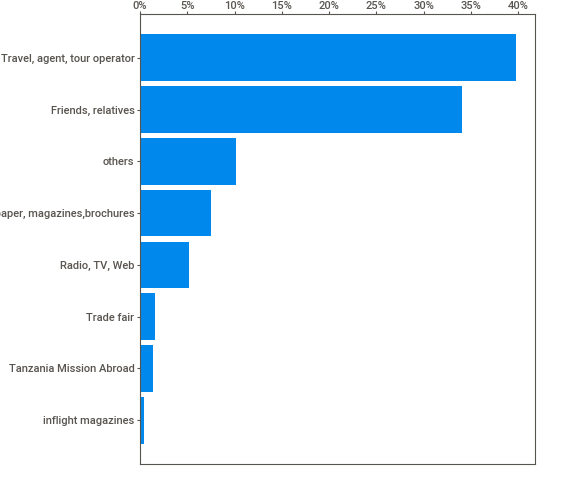
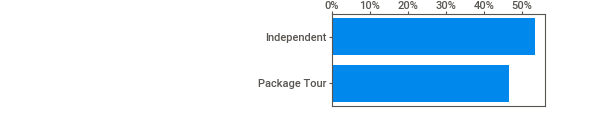
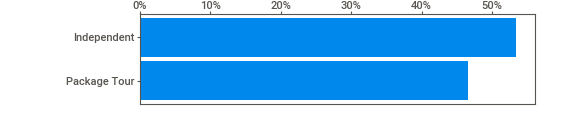
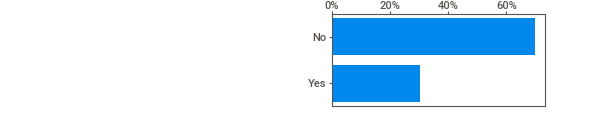
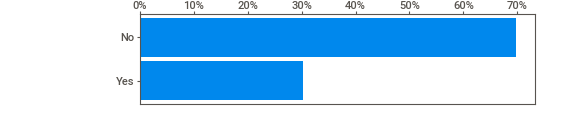
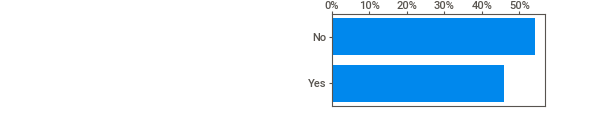
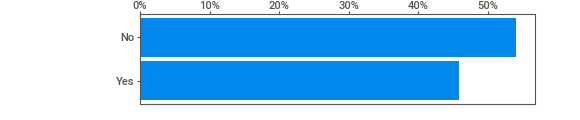
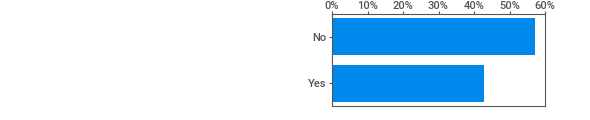
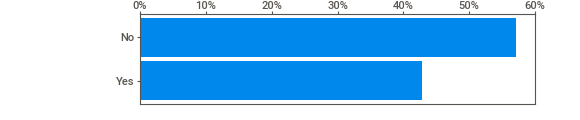
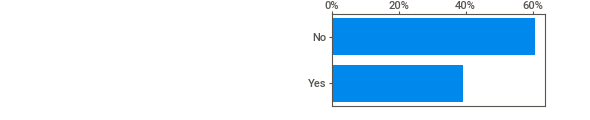
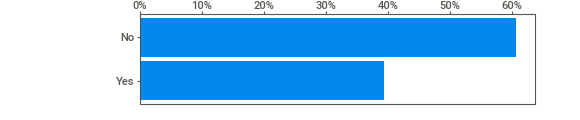
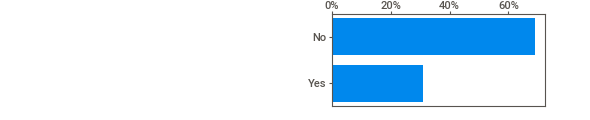
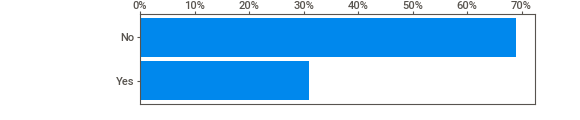
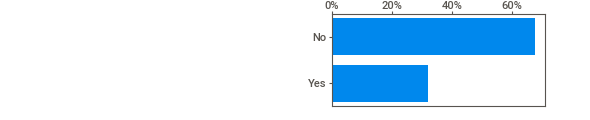
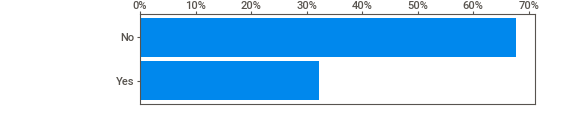
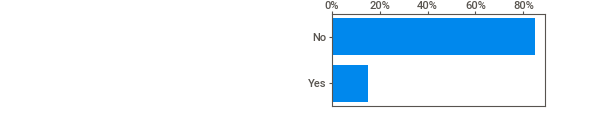
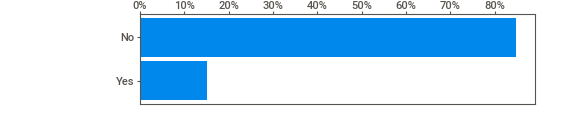
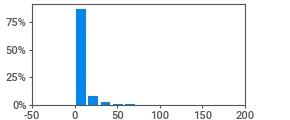
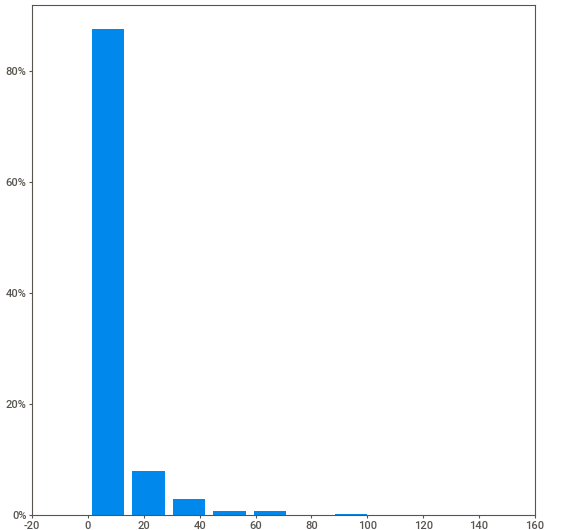
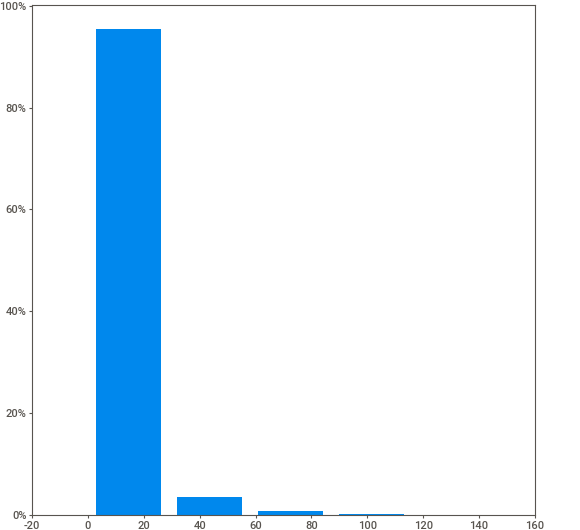
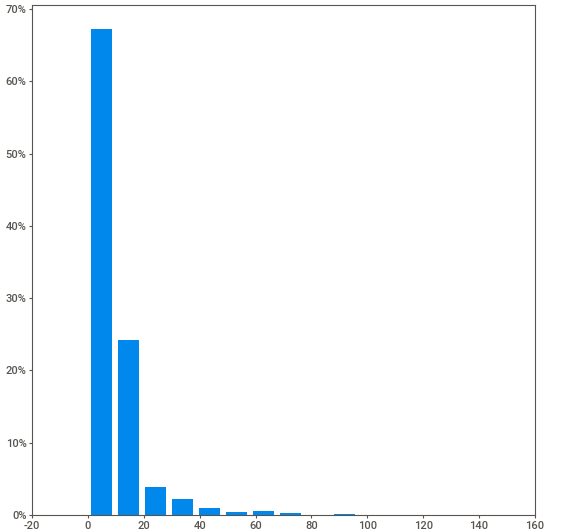
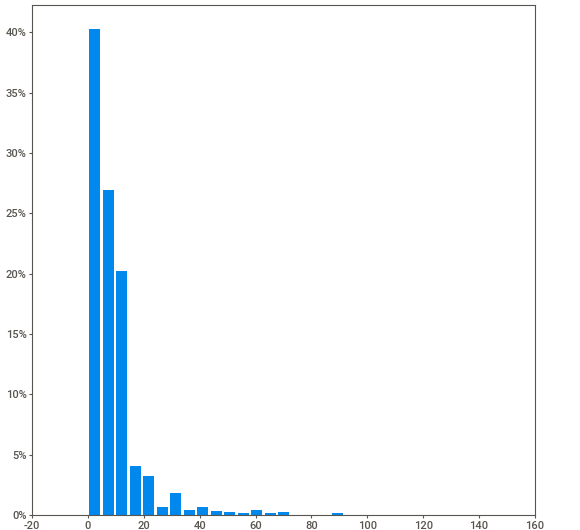
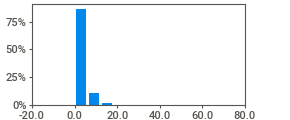
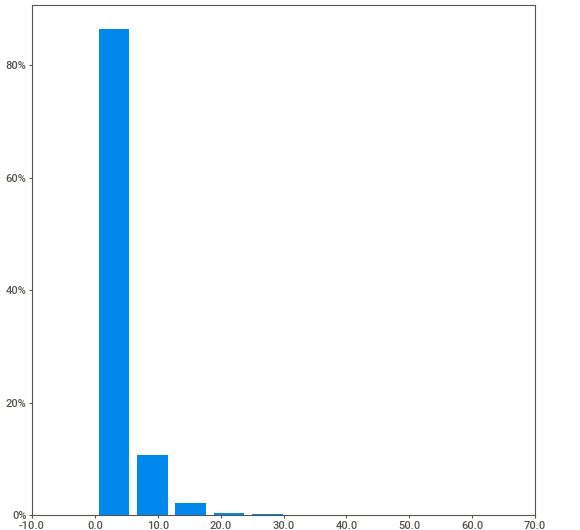
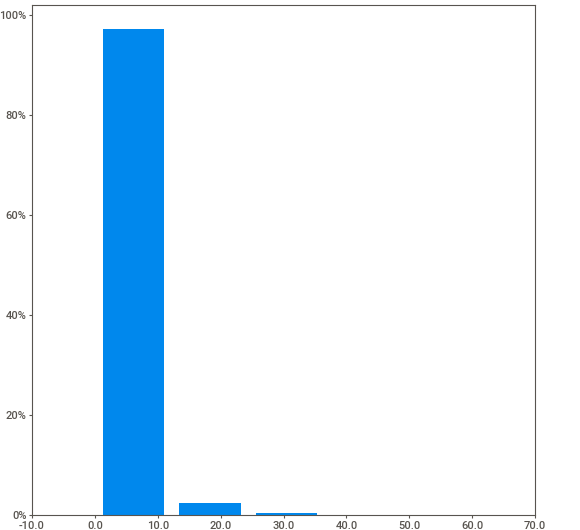
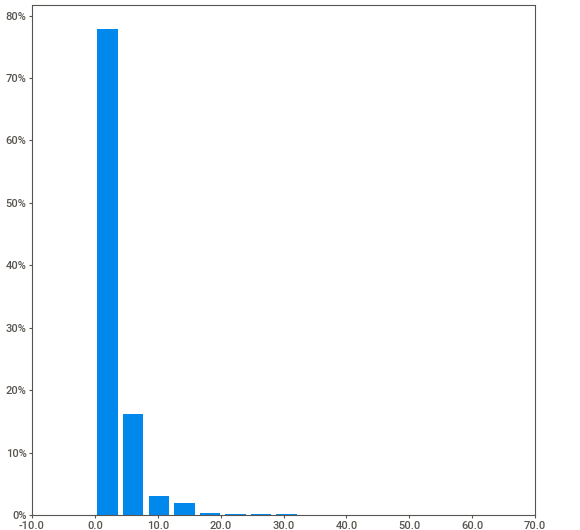
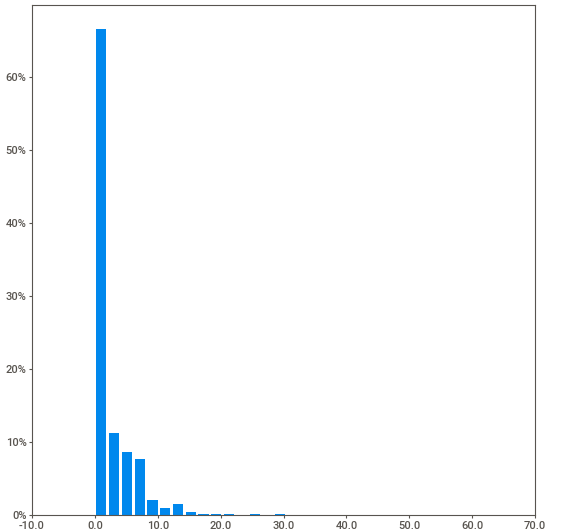
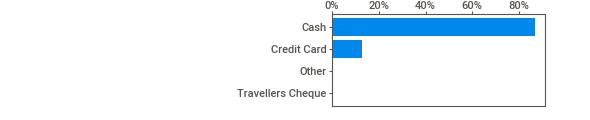
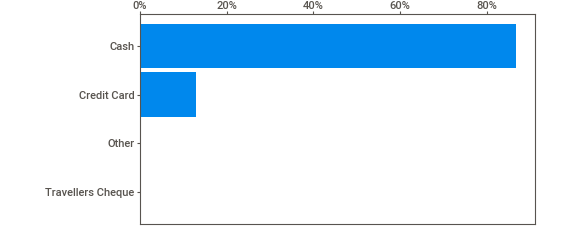
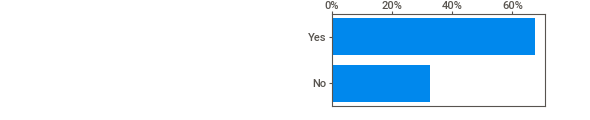
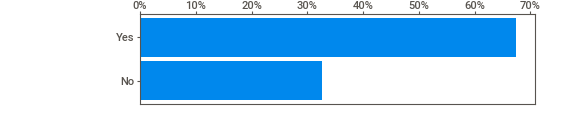
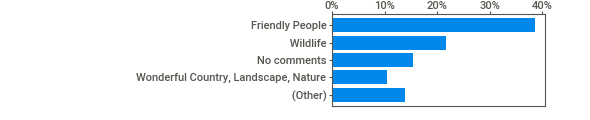
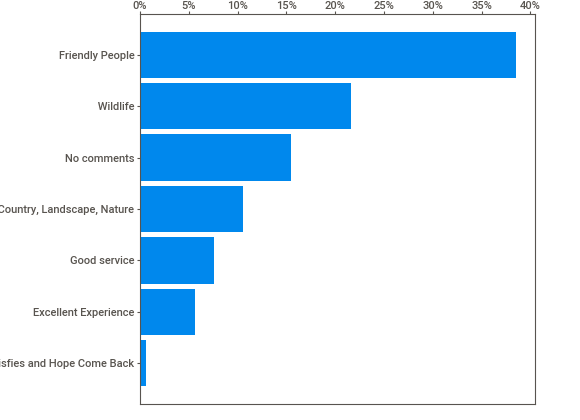
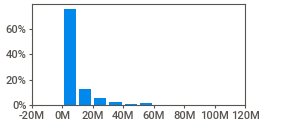
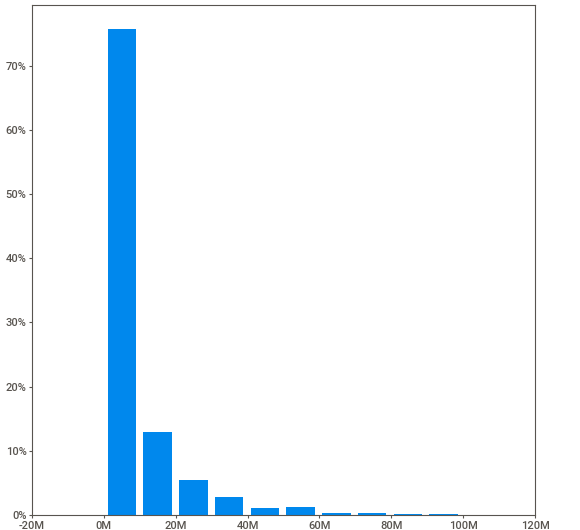
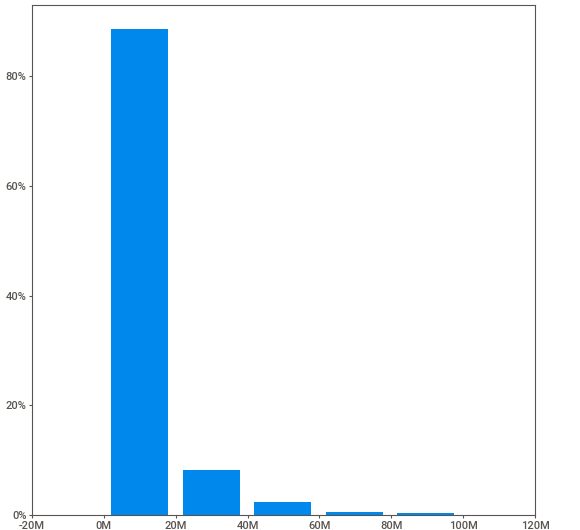
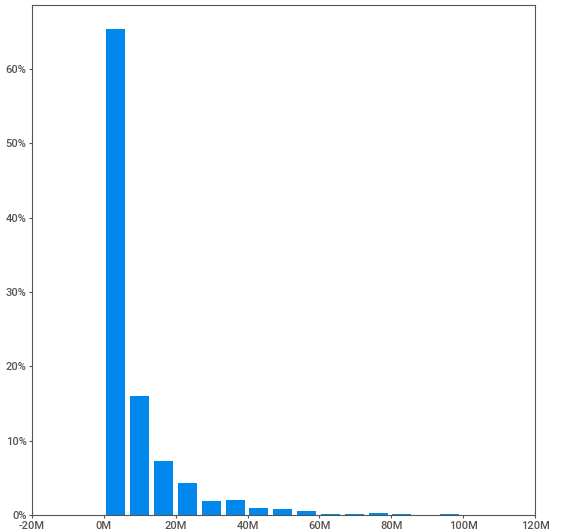
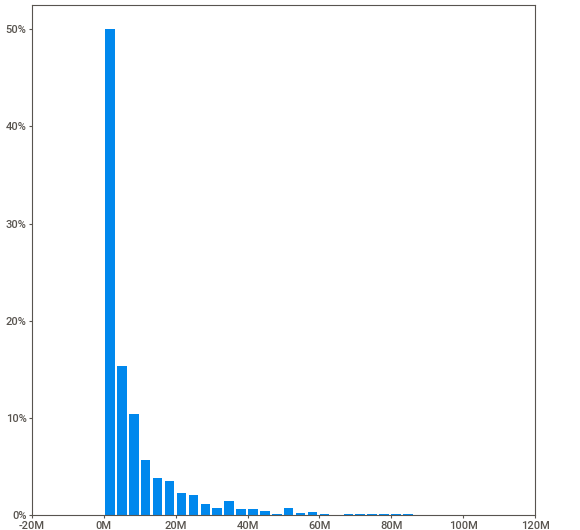
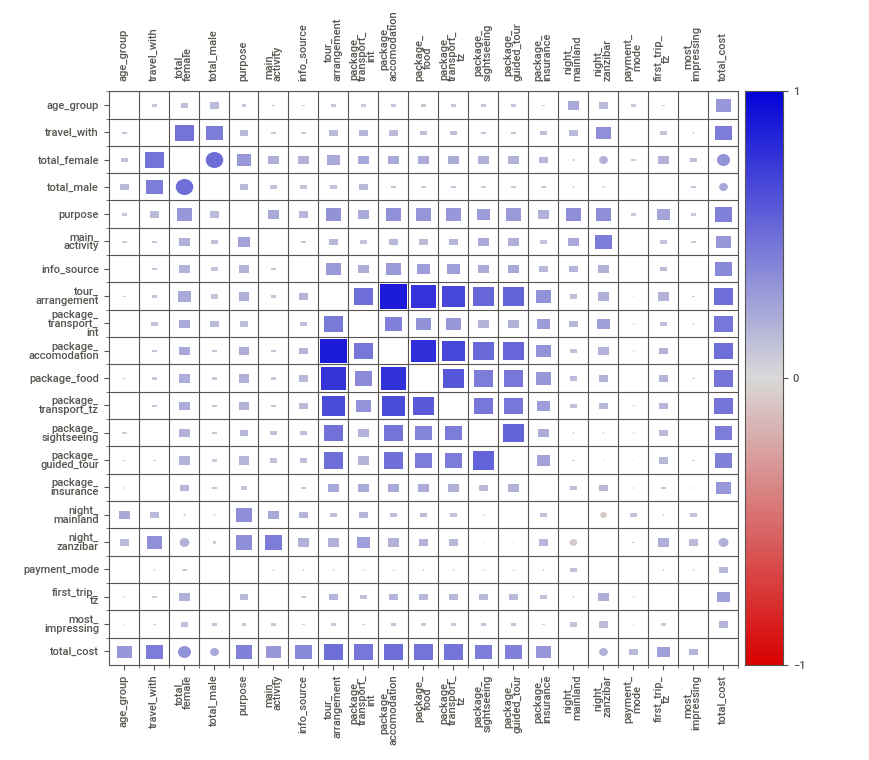
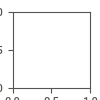

In [70]:
df_report_clean = sv.analyze(df)# perform EDA analysis
df_report_clean.show_notebook()

### HEAT MAP TO UNDERSTAND THE CORRELATION OF NUMERIC VARIABLES

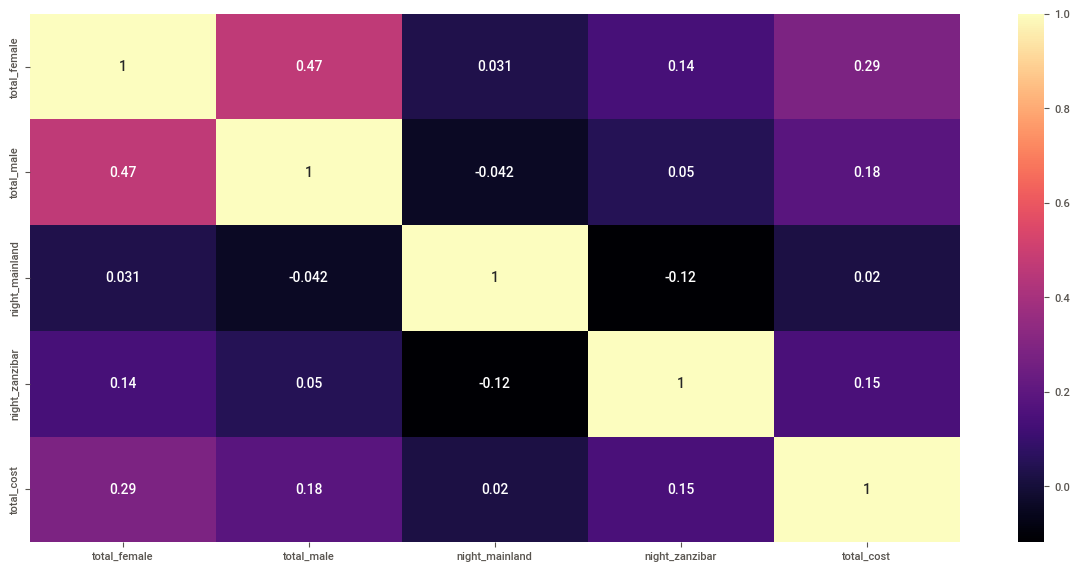

In [71]:
plt.figure(figsize=(15,7))
sns.heatmap(df.corr(), annot=True ,cmap="magma")
plt.show()

The map shows that number of people has more impact on the total cost, a strong correlation is observed only with the number of female tourists, followed with male tourists.

I expected a higher correlation with locations  zanzibar or mainland. What do you think, we can investigate number of female in more details.

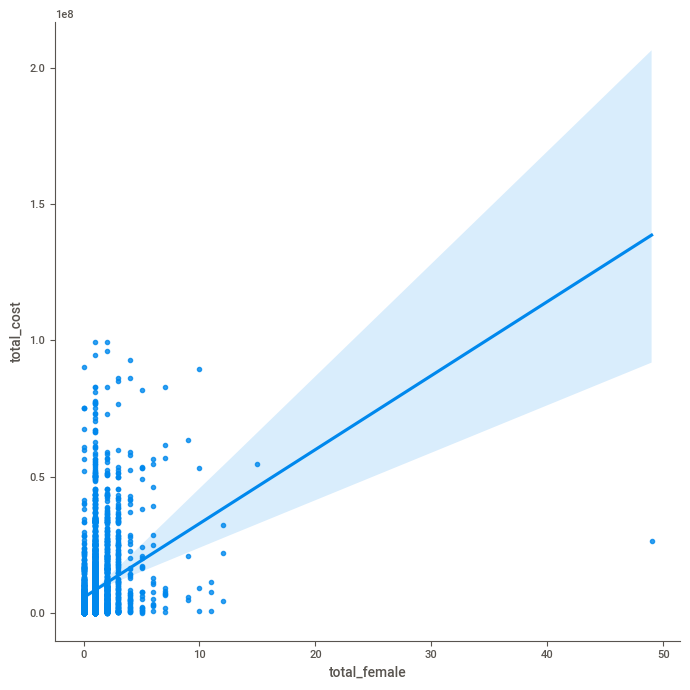

In [72]:
# %Distribution of total female and total cost
sns.lmplot(x="total_female", y="total_cost", data=df, palette = 'inferno_r', size = 7)
ax.set_title('Distribution of total female and total cost')
plt.show()

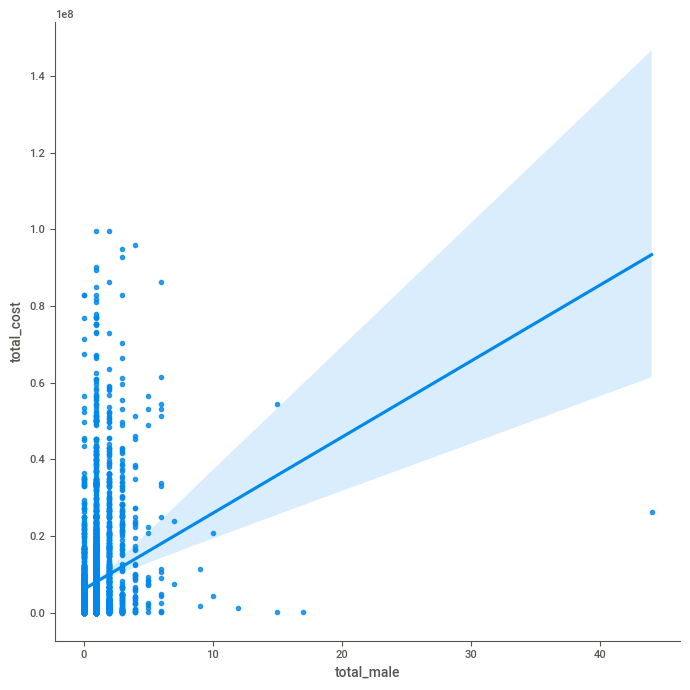

In [73]:
# %Distribution of total male and total cost
sns.lmplot(x="total_male", y="total_cost", data=df, palette = 'inferno_r', size = 7)
ax.set_title('Distribution of total male and total cost')
plt.show()

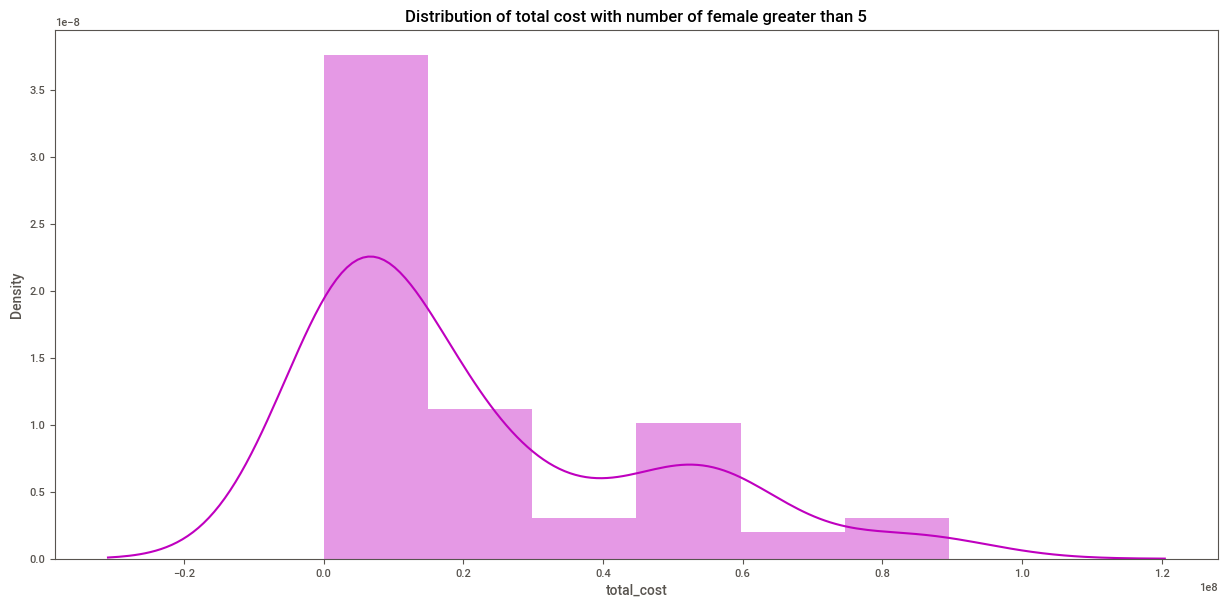

In [74]:
# %Distribution of total cost with number of female greater than 5
plt.figure(figsize=(15,7))
plt.title("Distribution of total cost with number of female greater than 5")
ax = sns.distplot(df[(df.total_female >= 5)]['total_cost'], color = 'm')

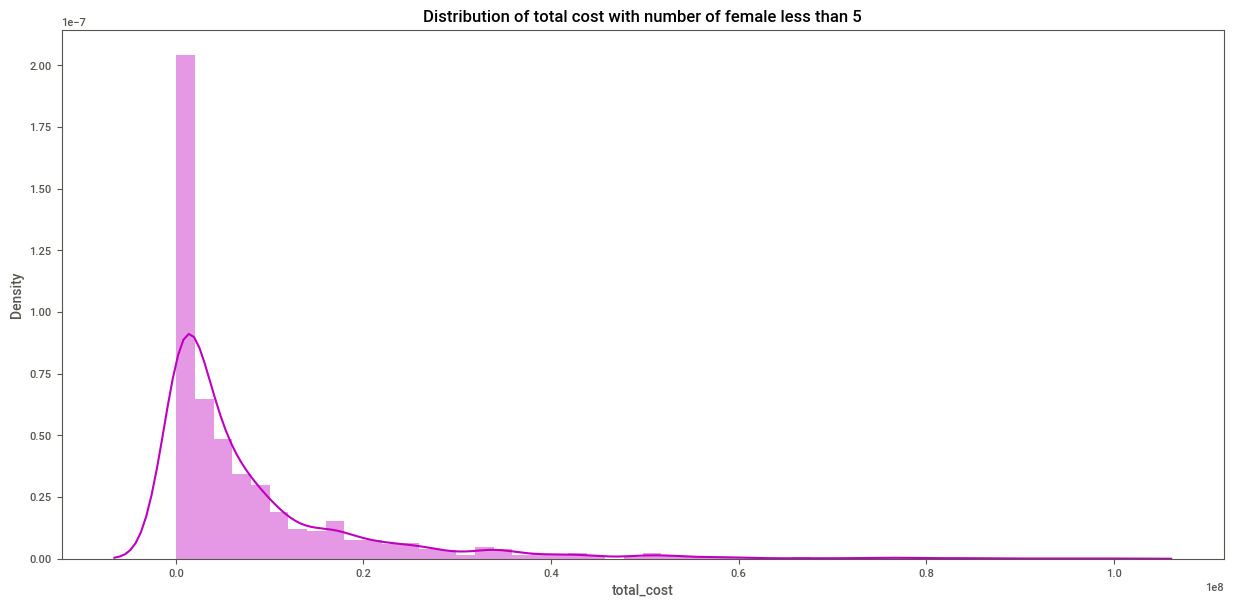

In [75]:
# %Distribution of total cost with number of female less than 5
plt.figure(figsize=(15,7))
plt.title("Distribution of total cost with number of female less than 5")
ax = sns.distplot(df[(df.total_female <= 5)]['total_cost'], color = 'm')

The distribution still confirming as the number of people increase also the total cost increase

In [76]:
# %Let's save data after EDA
df.to_csv("../Data/Clean_Tanzania_Tourism_datasets.csv",index=False)